Import Libraries :

In [14]:
import pandas as pd 
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


Load dataset :


In [25]:
#Load Titanic Dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Finding Missing Values :

In [26]:
mising_counts = df.isna().sum()

In [27]:
missing_percentage = df.isna().sum() / df.shape[0] * 100

In [28]:
#Create DataFrame For Missing Values
missing_table = pd.concat(
    [missing_percentage, mising_counts],
    axis=1,
    keys=['Missing Percentage', 'Missing Counts'],
)
missing_table

,Missing Percentage,Missing Counts
survived,0.000000,0
pclass,0.000000,0
sex,0.000000,0
age,19.865320,177
sibsp,0.000000,0
parch,0.000000,0
fare,0.000000,0
embarked,0.224467,2
class,0.000000,0
who,0.000000,0


Finding Hidding Missing Values :

In [19]:
#Handling Hidding Missing Values
suspecious_values = ['N/A', 'None', '-999', ' ', '']

for col in df.columns:
    if df[col].dtype != 'object':
        continue
    value_counts = df[col].value_counts()
    for value in suspecious_values:
        if value in value_counts:
            print(f"Column '{col}' contains {value_counts[value]} instances of '{value}'")

In [20]:
#Convert suspecious Values to NaN
df.replace(suspecious_values, np.nan, inplace=True)

Mean/Median Imputation :

In [21]:
#Mean imputation for 'age'
df['age_mean_imputed'] = df['age'].fillna(df['age'].mean())

#Median imputation for 'age'
df['age_median_imputed'] = df['age'].fillna(df['age'].median())



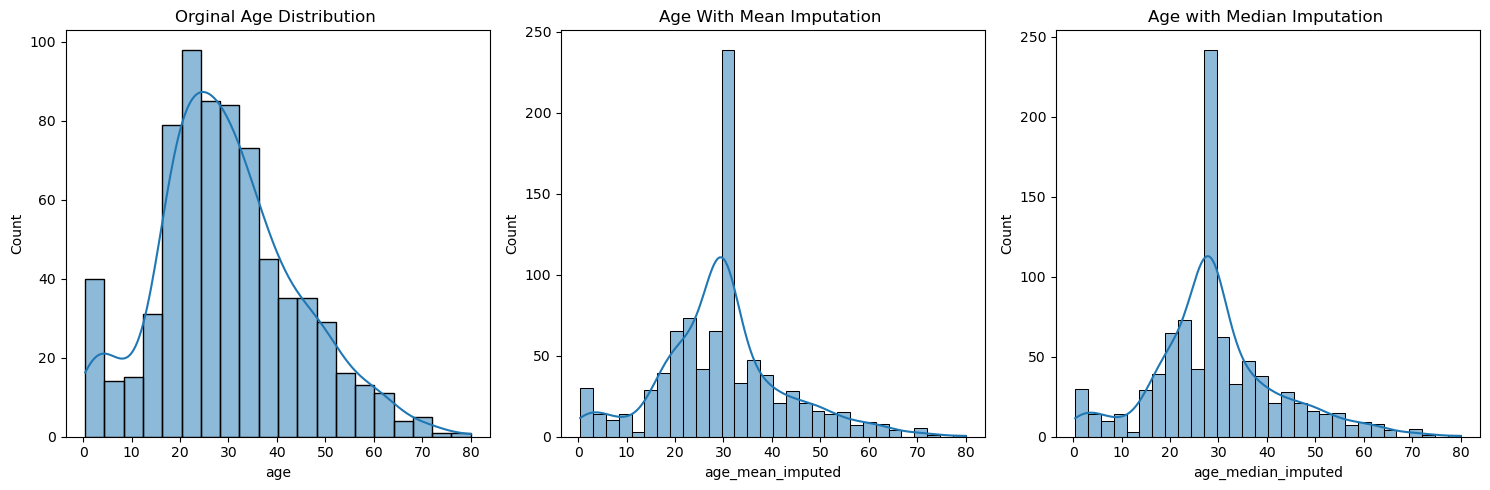

In [22]:

#Visualize the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['age'], kde=True, ax=ax1)
ax1.set_title('Orginal Age Distribution ')

sns.histplot(df['age_mean_imputed'], kde=True, ax=ax2)
ax2.set_title('Age With Mean Imputation ')

sns.histplot(df['age_median_imputed'], kde=True, ax=ax3)
ax3.set_title('Age with Median Imputation ')

plt.tight_layout()

Regression Imputation :

In [31]:
feauters_for_imputation = ['pclass', 'sex', 'fare']

df_subset = df[feauters_for_imputation + ['age']].copy()
df_subset

,pclass,sex,fare,age
0,3,male,7.2500,22.0
1,1,female,71.2833,38.0
2,3,female,7.9250,26.0
3,1,female,53.1000,35.0
4,3,male,8.0500,35.0
...,...,...,...,...
886,2,male,13.0000,27.0
887,1,female,30.0000,19.0
888,3,female,23.4500,NaN
889,1,male,30.0000,26.0


In [32]:
#Encode categorical variables
df_subset['sex'] = df_subset['sex'].map({'male' : 0, 'female' : 1})

In [35]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression


In [36]:
imputer = IterativeImputer(estimator=LinearRegression())

In [37]:
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_subset),
    columns=df_subset.columns
)

In [38]:
df_imputed

,pclass,sex,fare,age
0,3.0,0.0,7.2500,22.000000
1,1.0,1.0,71.2833,38.000000
2,3.0,1.0,7.9250,26.000000
3,1.0,1.0,53.1000,35.000000
4,3.0,0.0,8.0500,35.000000
...,...,...,...,...
886,2.0,0.0,13.0000,27.000000
887,1.0,1.0,30.0000,19.000000
888,3.0,1.0,23.4500,21.258419
889,1.0,0.0,30.0000,26.000000


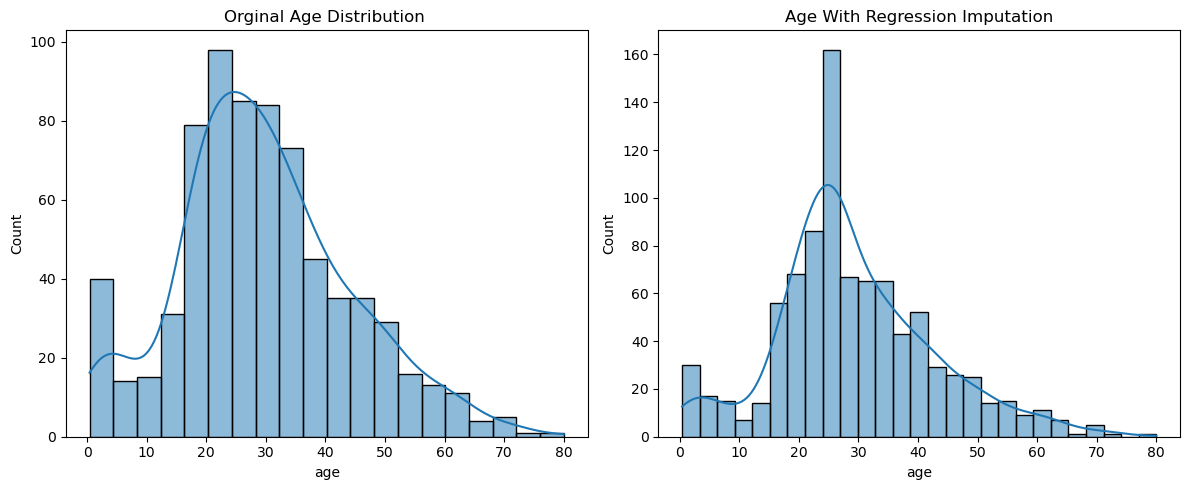

In [41]:
#visualize orginal vs imputed age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_subset['age'], kde=True, ax=ax1)
ax1.set_title('Orginal Age Distribution ')
sns.histplot(df_imputed['age'], kde=True, ax=ax2)
ax2.set_title('Age With Regression Imputation')
plt.tight_layout()
plt.show()

K-Nearest Neighbors Imputation :

In [42]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_KNN_imputed = pd.DataFrame(imputer.fit_transform(df_subset), columns=df_subset.columns)

In [43]:
df_KNN_imputed

,pclass,sex,fare,age
0,3.0,0.0,7.2500,22.0
1,1.0,1.0,71.2833,38.0
2,3.0,1.0,7.9250,26.0
3,1.0,1.0,53.1000,35.0
4,3.0,0.0,8.0500,35.0
...,...,...,...,...
886,2.0,0.0,13.0000,27.0
887,1.0,1.0,30.0000,19.0
888,3.0,1.0,23.4500,29.2
889,1.0,0.0,30.0000,26.0


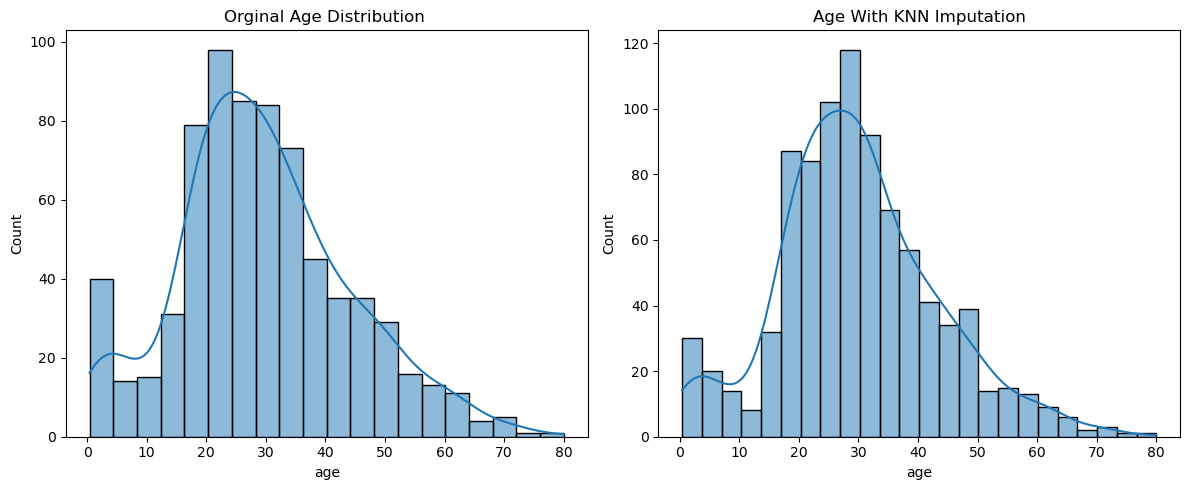

In [44]:
#visualize KNN imputed age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_subset['age'], kde=True, ax=ax1)
ax1.set_title('Orginal Age Distribution ')
sns.histplot(df_KNN_imputed['age'], kde=True, ax=ax2)
ax2.set_title('Age With KNN Imputation')
plt.tight_layout()
plt.show()